In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('realtor-data.csv')

In [3]:
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1004961,for_sale,2.0,1.0,NaN,Bronxville,New York,10708.0,950.0,NaN,249000.0
1004962,for_sale,3.0,2.0,0.14,Port Chester,New York,10573.0,1806.0,1994-01-13,599000.0
1004963,for_sale,4.0,4.0,0.36,Park Ridge,New Jersey,7656.0,NaN,2004-05-12,749000.0
1004964,for_sale,3.0,2.0,0.21,Yonkers,New York,10710.0,1797.0,2014-05-06,640000.0


In [4]:
df.state.value_counts()

New York          268563
New Jersey        251999
Massachusetts     175248
Connecticut        98221
New Hampshire      51394
Vermont            46460
Maine              36650
Rhode Island       29596
Puerto Rico        24679
Pennsylvania       17314
Virgin Islands      2573
Delaware            2135
Georgia               50
Virginia              31
South Carolina        25
Tennessee             20
West Virginia          5
Wyoming                3
Name: state, dtype: int64

In [5]:
df = df.dropna(subset='zip_code')
df['zip_code']=df['zip_code'].astype(int).astype(str).str.pad(5,side='left',fillchar='0')

/var/folders/mv/sqv0r5jd6kb4nlx2fkxvdh_h0000gn/T/ipykernel_20778/3592642009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zip_code']=df['zip_code'].astype(int).astype(str).str.pad(5,side='left',fillchar='0')


In [6]:
df_northeast = df[
    (df['state']=='New York')
    |(df['state']=='New Jersey')
    |(df['state']=='Massachusetts')
    |(df['state']=='Connecticut')
    |(df['state']=='New Hampshire')
    |(df['state']=='Vermont')
    |(df['state']=='Maine')
    |(df['state']=='Rhode Island')
    |(df['state']=='Pennsylvania')
    |(df['state']=='Delaware')
]

In [7]:
df_northeast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977555 entries, 24231 to 1004965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          977555 non-null  object 
 1   bed             842317 non-null  float64
 2   bath            859817 non-null  float64
 3   acre_lot        688500 non-null  float64
 4   city            977532 non-null  object 
 5   state           977555 non-null  object 
 6   zip_code        977555 non-null  object 
 7   house_size      659893 non-null  float64
 8   prev_sold_date  505754 non-null  object 
 9   price           977484 non-null  float64
dtypes: float64(5), object(5)
memory usage: 82.0+ MB


In [8]:
df_northeast.prev_sold_date.fillna('0000-00-00', inplace=True)
df_northeast.zip_code.fillna(00000.0, inplace=True)
df_northeast.city.fillna('unknown',inplace=True)
df_northeast.fillna(0.0,inplace=True)
df_northeast.info()

/var/folders/mv/sqv0r5jd6kb4nlx2fkxvdh_h0000gn/T/ipykernel_20778/1019146078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_northeast.prev_sold_date.fillna('0000-00-00', inplace=True)
/var/folders/mv/sqv0r5jd6kb4nlx2fkxvdh_h0000gn/T/ipykernel_20778/1019146078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_northeast.zip_code.fillna(00000.0, inplace=True)
/var/folders/mv/sqv0r5jd6kb4nlx2fkxvdh_h0000gn/T/ipykernel_20778/1019146078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977555 entries, 24231 to 1004965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          977555 non-null  object 
 1   bed             977555 non-null  float64
 2   bath            977555 non-null  float64
 3   acre_lot        977555 non-null  float64
 4   city            977555 non-null  object 
 5   state           977555 non-null  object 
 6   zip_code        977555 non-null  object 
 7   house_size      977555 non-null  float64
 8   prev_sold_date  977555 non-null  object 
 9   price           977555 non-null  float64
dtypes: float64(5), object(5)
memory usage: 82.0+ MB


In [9]:
df_northeast['vacant_lot'] = np.array(df_northeast['bed']) + np.array(df_northeast['bath'])  + np.array(df_northeast['house_size'])

/var/folders/mv/sqv0r5jd6kb4nlx2fkxvdh_h0000gn/T/ipykernel_20778/823457608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_northeast['vacant_lot'] = np.array(df_northeast['bed']) + np.array(df_northeast['bath'])  + np.array(df_northeast['house_size'])


In [10]:
df_northeast['status'].value_counts()

for_sale          975741
ready_to_build      1814
Name: status, dtype: int64

In [11]:
np.array(df_northeast['house_size']).size

977555

In [12]:
df_northeast['vacant_lot']=df_northeast['vacant_lot'].astype(bool).astype(int)

/var/folders/mv/sqv0r5jd6kb4nlx2fkxvdh_h0000gn/T/ipykernel_20778/1836845294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_northeast['vacant_lot']=df_northeast['vacant_lot'].astype(bool).astype(int)


In [13]:
df_northeast

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,vacant_lot
24231,for_sale,2.0,1.0,0.34,Agawam,Massachusetts,01001,676.0,0000-00-00,180000.0,1
24232,for_sale,0.0,0.0,3.41,Agawam,Massachusetts,01001,0.0,0000-00-00,25000.0,0
24233,for_sale,2.0,2.0,0.00,Agawam,Massachusetts,01001,892.0,2019-04-30,169900.0,1
24234,for_sale,2.0,2.0,0.00,Agawam,Massachusetts,01001,1428.0,0000-00-00,242000.0,1
24235,for_sale,2.0,2.0,0.00,Agawam,Massachusetts,01001,1659.0,0000-00-00,299950.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1004961,for_sale,2.0,1.0,0.00,Bronxville,New York,10708,950.0,0000-00-00,249000.0,1
1004962,for_sale,3.0,2.0,0.14,Port Chester,New York,10573,1806.0,1994-01-13,599000.0,1
1004963,for_sale,4.0,4.0,0.36,Park Ridge,New Jersey,07656,0.0,2004-05-12,749000.0,1
1004964,for_sale,3.0,2.0,0.21,Yonkers,New York,10710,1797.0,2014-05-06,640000.0,1


In [14]:
df_northeast

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,vacant_lot
24231,for_sale,2.0,1.0,0.34,Agawam,Massachusetts,01001,676.0,0000-00-00,180000.0,1
24232,for_sale,0.0,0.0,3.41,Agawam,Massachusetts,01001,0.0,0000-00-00,25000.0,0
24233,for_sale,2.0,2.0,0.00,Agawam,Massachusetts,01001,892.0,2019-04-30,169900.0,1
24234,for_sale,2.0,2.0,0.00,Agawam,Massachusetts,01001,1428.0,0000-00-00,242000.0,1
24235,for_sale,2.0,2.0,0.00,Agawam,Massachusetts,01001,1659.0,0000-00-00,299950.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1004961,for_sale,2.0,1.0,0.00,Bronxville,New York,10708,950.0,0000-00-00,249000.0,1
1004962,for_sale,3.0,2.0,0.14,Port Chester,New York,10573,1806.0,1994-01-13,599000.0,1
1004963,for_sale,4.0,4.0,0.36,Park Ridge,New Jersey,07656,0.0,2004-05-12,749000.0,1
1004964,for_sale,3.0,2.0,0.21,Yonkers,New York,10710,1797.0,2014-05-06,640000.0,1


In [15]:
len(set(list(df_northeast['zip_code'])))

3066

In [16]:
zip_list = list(df_northeast['zip_code'].value_counts().items())
type(zip_list[0][1])

int

In [17]:
zip_list = [x[0] for x in zip_list if x[1] <10]
zip_idx = [True if x not in zip_list else False for x in df_northeast['zip_code']]

In [18]:
df_northeast=df_northeast[zip_idx]

In [19]:
df_northeast

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,vacant_lot
24231,for_sale,2.0,1.0,0.34,Agawam,Massachusetts,01001,676.0,0000-00-00,180000.0,1
24232,for_sale,0.0,0.0,3.41,Agawam,Massachusetts,01001,0.0,0000-00-00,25000.0,0
24233,for_sale,2.0,2.0,0.00,Agawam,Massachusetts,01001,892.0,2019-04-30,169900.0,1
24234,for_sale,2.0,2.0,0.00,Agawam,Massachusetts,01001,1428.0,0000-00-00,242000.0,1
24235,for_sale,2.0,2.0,0.00,Agawam,Massachusetts,01001,1659.0,0000-00-00,299950.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1004961,for_sale,2.0,1.0,0.00,Bronxville,New York,10708,950.0,0000-00-00,249000.0,1
1004962,for_sale,3.0,2.0,0.14,Port Chester,New York,10573,1806.0,1994-01-13,599000.0,1
1004963,for_sale,4.0,4.0,0.36,Park Ridge,New Jersey,07656,0.0,2004-05-12,749000.0,1
1004964,for_sale,3.0,2.0,0.21,Yonkers,New York,10710,1797.0,2014-05-06,640000.0,1


In [20]:
df_homes = df_northeast[list(df_northeast['vacant_lot'].astype(bool))]
df_homes = df_homes[df_homes['price'] < np.median(df_homes['price'])+(np.std(df_homes['price']*2))]
df_homes = df_homes[df_homes['house_size'] < np.median(df_homes['house_size'])+(np.std(df_homes['house_size']*2))]
df_homes = df_homes[df_homes['house_size']>0]


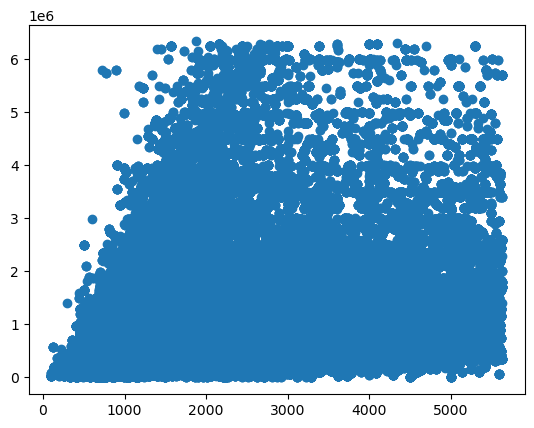

In [21]:
plt.scatter(np.array(df_homes['house_size']).reshape(-1,1),np.array(df_homes['price']).reshape(-1,1))

In [22]:
zip_homes_df = df_homes.groupby('zip_code').mean().drop(columns='vacant_lot').sort_values('price',ascending=True)
zip_homes_df.reset_index(inplace=True)
zip_length = zip_homes_df.shape[0]
zip_homes_df.sort_values('price', ascending=False, inplace=True)
zip_homes_df['zip_rank'] = list(zip_homes_df.index)
zip_homes_df

,zip_code,bed,bath,acre_lot,house_size,price,zip_rank
2773,02199,2.317308,2.913462,0.006971,1933.788462,4.016154e+06,2773
2772,10103,1.000000,1.000000,0.000000,1203.000000,3.595000e+06,2772
2771,02554,3.827815,3.490066,0.444702,2314.059603,3.474821e+06,2771
2770,02647,4.500000,4.000000,0.305000,2798.500000,3.447500e+06,2770
2769,10013,2.139130,2.326421,0.429425,1770.666890,3.412207e+06,2769
...,...,...,...,...,...,...,...
4,04680,3.473684,1.473684,11.684211,1494.736842,6.684211e+04,4
3,01103,2.000000,1.500000,0.000000,905.000000,6.500000e+04,3
2,04859,3.000000,1.000000,0.450000,924.000000,5.900000e+04,2
1,04667,2.000000,1.000000,1.115000,917.500000,5.345000e+04,1


In [23]:
most_expensive_zip = zip_homes_df.iloc[0:int(zip_length/3)]
most_expensive_zip.head(3)

,zip_code,bed,bath,acre_lot,house_size,price,zip_rank
2773,02199,2.317308,2.913462,0.006971,1933.788462,4.016154e+06,2773
2772,10103,1.000000,1.000000,0.000000,1203.000000,3.595000e+06,2772
2771,02554,3.827815,3.490066,0.444702,2314.059603,3.474821e+06,2771


In [24]:
middle_price_zip = zip_homes_df.iloc[int(zip_length/3)+1:int(zip_length/3)*2]
middle_price_zip.head(3)

,zip_code,bed,bath,acre_lot,house_size,price,zip_rank
1848,06901,2.243590,2.384615,0.005641,1513.782051,621849.974359,1848
1847,07307,2.202726,1.926178,0.003078,1122.737649,621050.489495,1847
1846,01462,3.215805,2.680851,2.754468,2118.793313,620956.534954,1846


In [25]:
least_expensive_zip = zip_homes_df.iloc[(int(zip_length/3)+1)*2+1:]
least_expensive_zip.head(3)

,zip_code,bed,bath,acre_lot,house_size,price,zip_rank
922,01012,2.000000,2.00000,2.030000,1655.000000,374900.000000,922
921,07430,2.000000,2.00000,0.110000,1047.000000,374900.000000,921
920,01007,3.092732,2.43609,3.270476,1691.082707,374708.192982,920


In [26]:
features = zip_homes_df.drop(columns='price')
scaler = StandardScaler()
X = np.array(features)
X = scaler.fit_transform(X)
y = np.array(zip_homes_df['price'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)

In [27]:
def run_linreg(X,y):
    lr = LinearRegression()
    lr=lr.fit(X, y)
    coef_ = lr.coef_
    y_int_ = lr.intercept_    
    return (coef_,y_int_)

In [28]:
print(X)
m,b=run_linreg(X,y)
print(m,b)
pred = [m*x+b for x in X]
pred = np.array(pred)
l=pred.shape[1]
for z in range(l):
    print(r2_score(y,pred[:,z]),features.columns[z])

[[-1.0065431  -1.13397368  0.74027312 -0.06688714 -0.14241003  1.73142653]
 [ 0.69701702 -2.70694163 -1.8556103  -0.06692571 -1.29838108  1.73017776]
 [-0.93002946  0.66968915  1.5225196  -0.06446578  0.45910799  1.72892898]
 ...
 [-0.4332296  -0.3187859  -1.8556103  -0.06443647 -1.73970704 -1.72892898]
 [-0.47461162 -1.51286377 -1.8556103  -0.06075794 -1.74998883 -1.73017776]
 [ 1.30503108 -1.51286377 -1.8556103  -0.06526622 -1.65112548 -1.73142653]]
[  1583.90571847 -15879.63244941  15724.40370762   7367.99429013
  -3675.39384389 367586.02204013] 605715.2665482281
-0.00010407763597575226 zip_code
-0.009631557353567022 bed
0.031054058505018967 bath
0.00035014512849762536 acre_lot
-0.005943210206823979 house_size
0.6812841994870036 zip_rank


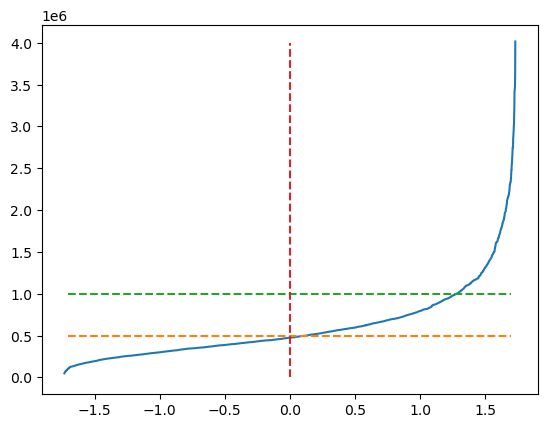

In [29]:
plt.plot(X[:,5],y)
plt.plot([-1.7,1.7],[500000,500000],linestyle='dashed')
plt.plot([-1.7,1.7],[1000000,1000000],linestyle='dashed')
plt.plot([0,0],[0,4000000],linestyle='dashed')

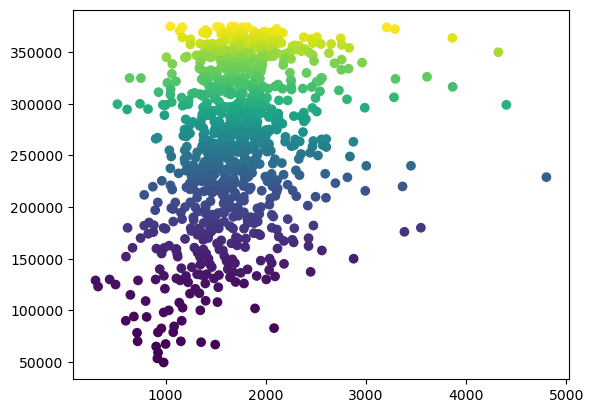

In [30]:
plt.scatter(least_expensive_zip['house_size'],least_expensive_zip['price'],c=least_expensive_zip['zip_rank'])

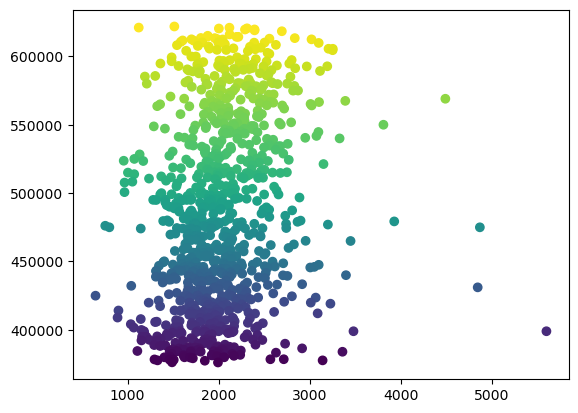

In [31]:
plt.scatter(middle_price_zip['house_size'],middle_price_zip['price'],c=middle_price_zip['zip_rank'])

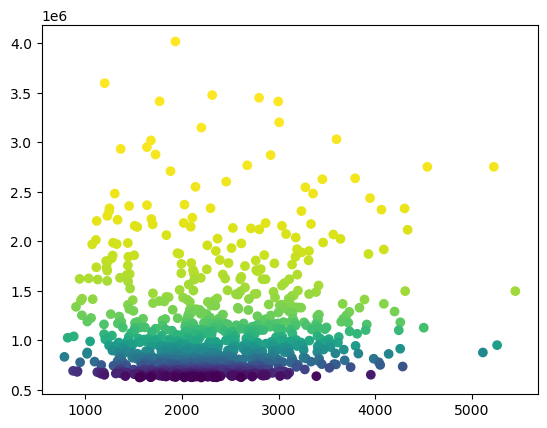

In [32]:
plt.scatter(most_expensive_zip['house_size'],most_expensive_zip['price'],c=most_expensive_zip['zip_rank'])

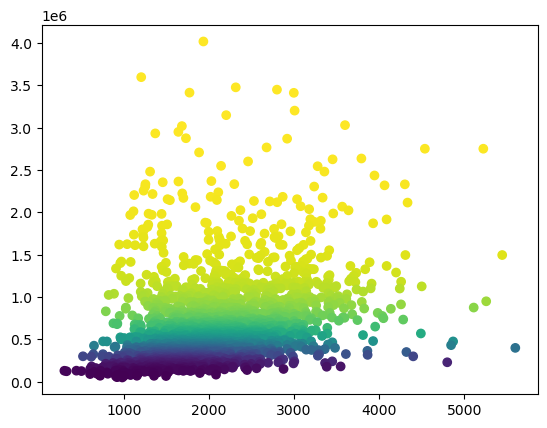

In [33]:
plt.scatter(zip_homes_df['house_size'],zip_homes_df['price'],c=zip_homes_df['zip_rank'])

In [34]:
features = zip_homes_df.drop(columns='price')
scaler = StandardScaler()
y = np.array(zip_homes_df['price'])
features = features[[z<1000000 for z in y]]
y=np.array(zip_homes_df[[z<1000000 for z in y]]['price'])
X = np.array(features)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)

In [35]:
print(X)
m,b=run_linreg(X,y)
print(m,b)
pred = [m*x+b for x in X]
pred = np.array(pred)
l=pred.shape[1]
for z in range(l):
    print(r2_score(y,pred[:,z]),features.columns[z])

[[ 1.19159859 -0.65339893  0.15359239  0.22894273  0.86474182  1.73133286]
 [ 0.03511065  0.61750907  1.50932809 -0.07377308  1.0301013   1.72989666]
 [-0.32268841 -0.29938556  0.14930914  0.39532913  1.2894915   1.72846047]
 ...
 [-0.42845957 -0.29938556 -1.88352342 -0.07208439 -1.81539107 -1.72846047]
 [-0.4691571  -1.53843235 -1.88352342 -0.06651955 -1.82676981 -1.72989666]
 [ 1.28104836 -1.53843235 -1.88352342 -0.07333961 -1.71735877 -1.73133286]]
[  2166.53489871   2983.52674824  -3597.37964111    758.64605665
   2115.55282826 208081.10798359] 468256.79536740994
-0.0003591035985759383 zip_code
0.004919682017935689 bed
-0.017880818152497202 bath
-0.0002621523993688868 acre_lot
0.008525929047167646 house_size
0.9569037777362536 zip_rank


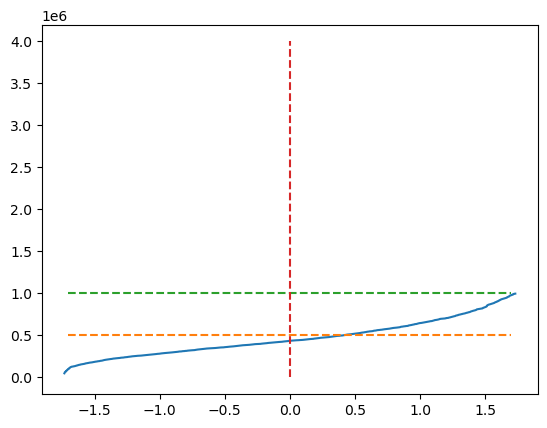

In [36]:
plt.plot(X[:,5],y)
plt.plot([-1.7,1.7],[500000,500000],linestyle='dashed')
plt.plot([-1.7,1.7],[1000000,1000000],linestyle='dashed')
plt.plot([0,0],[0,4000000],linestyle='dashed')

In [37]:
more_condo_df = features[features['acre_lot'] == 0]
more_condo_df

,zip_code,bed,bath,acre_lot,house_size,zip_rank
2392,03575,3.952381,3.333333,0.0,2351.809524,2392
2034,01434,3.000000,3.130435,0.0,1994.571429,2034
1970,10034,1.794183,1.335570,0.0,1126.729306,1970
1533,07075,2.000000,2.000000,0.0,1004.000000,1533
1510,11005,1.409483,2.077586,0.0,1235.517241,1510
1374,03826,2.000000,2.617647,0.0,1605.235294,1374
987,01718,2.250000,2.250000,0.0,1414.500000,987
839,02763,2.000000,3.000000,0.0,1740.000000,839
737,10931,4.000000,2.000000,0.0,1848.000000,737
582,07022,1.000000,3.000000,0.0,1000.000000,582


In [38]:
more_house_zips = features[features['acre_lot'] > 0]['zip_code']

In [39]:
more_house_zips = list(more_house_zips)

In [40]:
cond = [x[1]['zip_code'] in more_house_zips for x in df_homes.iterrows()]
print(cond[0:5])
more_house_df = df_homes[cond]
more_house_df

[True, True, True, True, True]


,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,vacant_lot
24231,for_sale,2.0,1.0,0.34,Agawam,Massachusetts,01001,676.0,0000-00-00,180000.0,1
24233,for_sale,2.0,2.0,0.00,Agawam,Massachusetts,01001,892.0,2019-04-30,169900.0,1
24234,for_sale,2.0,2.0,0.00,Agawam,Massachusetts,01001,1428.0,0000-00-00,242000.0,1
24235,for_sale,2.0,2.0,0.00,Agawam,Massachusetts,01001,1659.0,0000-00-00,299950.0,1
24236,for_sale,3.0,1.0,0.46,Agawam,Massachusetts,01001,1196.0,0000-00-00,239900.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1004959,for_sale,2.0,1.0,0.14,White Plains,New York,10603,730.0,1999-11-26,332500.0,1
1004960,for_sale,3.0,2.0,0.11,Scarsdale,New York,10583,1578.0,0000-00-00,699000.0,1
1004961,for_sale,2.0,1.0,0.00,Bronxville,New York,10708,950.0,0000-00-00,249000.0,1
1004962,for_sale,3.0,2.0,0.14,Port Chester,New York,10573,1806.0,1994-01-13,599000.0,1


In [41]:
more_house_df = more_house_df[more_house_df['acre_lot'] != 0.0]

In [42]:
more_house_df = more_house_df.merge(zip_homes_df[['zip_code','price']], on='zip_code',suffixes = ('','_median'))
more_house_df.reset_index(inplace=True)
more_house_df

,index,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,vacant_lot,price_median
0,0,for_sale,2.0,1.0,0.34,Agawam,Massachusetts,01001,676.0,0000-00-00,180000.0,1,342528.165414
1,1,for_sale,3.0,1.0,0.46,Agawam,Massachusetts,01001,1196.0,0000-00-00,239900.0,1,342528.165414
2,2,for_sale,3.0,3.0,0.45,Agawam,Massachusetts,01001,2314.0,2014-06-25,525000.0,1,342528.165414
3,3,for_sale,3.0,2.0,0.36,Agawam,Massachusetts,01001,1276.0,2012-10-12,289900.0,1,342528.165414
4,4,for_sale,4.0,2.0,0.11,Agawam,Massachusetts,01001,1732.0,0000-00-00,275000.0,1,342528.165414
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383217,383217,for_sale,2.0,1.0,2.70,Greenfield Park,New York,12435,660.0,0000-00-00,165000.0,1,314333.333333
383218,383218,for_sale,3.0,3.0,8.30,Greenfield Park,New York,12435,2400.0,1993-02-01,549000.0,1,314333.333333
383219,383219,for_sale,3.0,2.0,1.80,Greenfield Park,New York,12435,1365.0,0000-00-00,229000.0,1,314333.333333
383220,383220,for_sale,2.0,1.0,2.70,Greenfield Park,New York,12435,660.0,0000-00-00,165000.0,1,314333.333333


In [84]:
target = more_house_df['price']
features = more_house_df[['bed','bath','acre_lot','house_size','price_median']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-9.75032753e-01, -1.20881284e+00, -1.25762543e-02,
        -1.40560321e+00, -6.74672907e-01],
       [-3.47901845e-01, -1.20881284e+00, -1.23859361e-02,
        -8.76985397e-01, -6.74672907e-01],
       [-3.47901845e-01,  5.12617069e-01, -1.24017959e-02,
         2.59542900e-01, -6.74672907e-01],
       ...,
       [-3.47901845e-01, -3.48097886e-01, -1.02607161e-02,
        -7.05184608e-01, -8.08862013e-01],
       [-9.75032753e-01, -1.20881284e+00, -8.83332961e-03,
        -1.42186837e+00, -8.08862013e-01],
       [-3.47901845e-01,  5.12617069e-01,  4.81865110e-05,
         3.46968153e-01, -8.08862013e-01]])

In [85]:
run_linreg(np.array(scaled_features),np.array(target))

(array([ -7566.97193567,  86144.46499379,    980.17927507, 111208.19277977,
        193208.43784521]),
 522004.32406542415)

In [86]:
X_train,X_test,y_train,y_test = train_test_split(scaled_features,target, test_size = .4, random_state=0)

In [87]:
rf = RandomForestRegressor(random_state=0)
# rs = RandomizedSearchCV(rf,{
#     'n_estimators':[60,100],
#     'criterion': ['squared_error', 'absolute_error']},n_iter=2,random_state=0)
# rs.fit(X_train,y_train)
# rs.best_params_
rf.fit(X_train,y_train)
pred = rf.predict(X_test)


In [88]:
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))

0.9826983663395905
2598464904.187718


In [89]:
for row in list(zip(y_test[0:50],pred[0:50])):
    print(row)

(578743.0, 577941.52)
(1395000.0, 1395000.0)
(215000.0, 215000.0)
(1186000.0, 1246499.79)
(424900.0, 423841.0)
(948900.0, 955769.1168373295)
(447000.0, 441602.0)
(1250000.0, 1250000.0)
(499000.0, 491746.0)
(560000.0, 560000.0)
(320000.0, 320000.0)
(185000.0, 185000.0)
(3150000.0, 3150000.0)
(429900.0, 429900.0)
(560000.0, 560000.0)
(270000.0, 267497.0)
(99900.0, 99900.0)
(973000.0, 1053758.88)
(360000.0, 360000.0)
(375000.0, 375000.0)
(175000.0, 175000.0)
(349900.0, 349900.0)
(441030.0, 451556.36)
(264265.0, 264977.7)
(699900.0, 699900.0)
(899800.0, 899800.0)
(639000.0, 639000.0)
(459900.0, 459900.0)
(680000.0, 680000.0)
(209900.0, 209900.0)
(1899000.0, 1899000.0)
(1300000.0, 1300000.0)
(239000.0, 239000.0)
(280000.0, 223110.0)
(190000.0, 191042.0)
(294500.0, 295050.0)
(219900.0, 219900.0)
(639900.0, 639900.0)
(499900.0, 494753.0)
(359800.0, 359800.0)
(189900.0, 189900.0)
(335000.0, 335044.0)
(379900.0, 380951.0)
(1575000.0, 1575000.0)
(750000.0, 735740.0)
(529900.0, 529900.0)
(725000.